# Marangoni convection

initial-boundary value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\frac{1}{Pr}\left(\frac{\partial\textbf{u}}{\partial t}+\textbf{u}\cdot\nabla\textbf{u}\right)=-\nabla p + \mu\nabla^2\textbf{u} + \rho(c)\,\textbf{e}_g$$

$$\frac{\partial c}{\partial t} + \textbf{u}\cdot\nabla c = \nabla^2 c$$

constitutive relations

$$\varepsilon(\textbf{u})=\tfrac{1}{2}(\nabla\textbf{u} + (\nabla\textbf{u})^{\mathsf{T}})$$

$$\sigma(\textbf{u}, p) = -p\,\mathsf{I} + 2\mu\varepsilon(\textbf{u})$$

$$\implies \nabla\cdot\sigma=-\nabla p + \mu\nabla^2\textbf{u}$$

$$\rho(c)=-Ra\,c$$

$$\gamma(c) = \gamma_0 - Ma\,c$$

initial conditions

$$\textbf{u}(\textbf{x},t=0)=\textbf{u}_0(\textbf{x})$$

$$p(\textbf{x},t=0)=p_0(\textbf{x})$$

Dirichlet boundary condition on $\textbf{x}\in\partial\Omega_{\text{D},c}$

$$c = c_{\text{D}}$$

Neumann boundary condition on $\textbf{x}\in\partial\Omega_{\text{N},c}=\partial\Omega/\partial\Omega_{\text{D},c}$

$$\textbf{n}\cdot\nabla c = c_{\text{N}}$$

essential boundary condition on $\textbf{x}\in\partial\Omega_E$

$$\textbf{u} = \textbf{u}_{\text{E}}$$

natural boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{E}}$

$$\sigma\cdot\textbf{n} = \left(\textbf{t}\cdot\nabla\gamma\right)\textbf{t} + \left(-p_{\text{ext}} + (\nabla\cdot\textbf{n})\gamma\right)\textbf{n}$$

mapping to Navier-Stokes equations defined in `demo/py/navier_stokes.py`

$$
\begin{Bmatrix}
\rho \\
\mu \\
\textbf{f}
\end{Bmatrix}
\mapsto
\begin{Bmatrix}
\frac{1}{Pr} \\ 
1 \\
\rho\,\textbf{e}_g
\end{Bmatrix}
$$

## Example: $d=2$ rectangle


$$\Omega = [0, L_x] \times [0, L_y]$$

$$\textbf{e}_g=-\textbf{e}_y$$

$$\begin{align*}
&\nabla\gamma = -Ma\nabla c~~,~~p_{\text{ext}}=0 \\
&\implies(\sigma\cdot\textbf{n})\vert_{x,y=L_y} = \left(\frac{\partial\gamma}{\partial x}\textbf{e}_x -p_{\text{ext}}\textbf{e}_y\right)\bigg\vert_{x,y=L_y} = -Ma\frac{\partial c}{\partial x}\bigg\vert_{x,y=L_y}\,\textbf{e}_x
\end{align*}
$$

$$\begin{align*}
&(\textbf{n}\cdot\textbf{u})\vert_{x,y=L_y}=u_y\vert_{x,y=L_y}=0 \\
&\implies \frac{\partial u_x}{\partial y}\bigg\vert_{x,y=L_y}=-Ma\frac{\partial c}{\partial x}\bigg\vert_{x,y=L_y}
\end{align*}
$$

$$c_0(x,y)=\text{exp}\left(-\frac{(y-h)^2}{\epsilon}\right) + \mathcal{N}(x,y)$$

$$(\textbf{n}\cdot\nabla c)\vert_{\partial\Omega}=0$$

$$\textbf{u}(x=0, y)=\textbf{u}(x=L_x, y)=\textbf{u}(x, y=0)=\textbf{0}$$

In [1]:
import numpy as np
from lucifex.sim import integrate
from lucifex.viz import plot_colormap, plot_streamlines, plot_line, plot_stacked_lines
from lucifex.io import write
from lucifex.utils import fem_function_components, maximum, minimum

from py.navier_stokes_marangoni import navier_stokes_marangoni


Lx = 2.0
Ly = 1.0
h = 0.8 * Ly
eps = 0.01 * Ly
Ra = 1e2
Pr = 1e1
Ma = 1e4
simulation = navier_stokes_marangoni(
    Lx=Lx,
    Ly=Ly,    
    Nx=64,
    Ny=64,
    cell='quadrilateral',
    Ra=Ra,
    Pr=Pr,
    Ma=Ma,
    c_base=lambda x: np.exp(-(x[1] - h)**2 / eps),
    noise_eps=1e-3,
    noise_freq=(16, 8),
    dt_max=0.01, 
)

n_stop = 50
dt_init = 1e-6
n_init = 10
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

In [ ]:
c, u = simulation['c', 'u']

time_indices = [int(i * len(c.series)) for i in (0.25, 0.5, 0.75)]
for i in (0, *time_indices, -1):
    cn = c.series[i]
    tn = c.time_series[i]
    un = u.series[i]
    ux, uy = fem_function_components(('P', 1), un, names=('ux', 'uy'))
    fig, ax = plot_colormap(cn, title=f'$c(t={tn:.2e})$')
    plot_streamlines(fig, ax, (ux, uy), color='cyan')
    write(fig, f'A19_marangoni_convection_c(t={tn:.2e})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

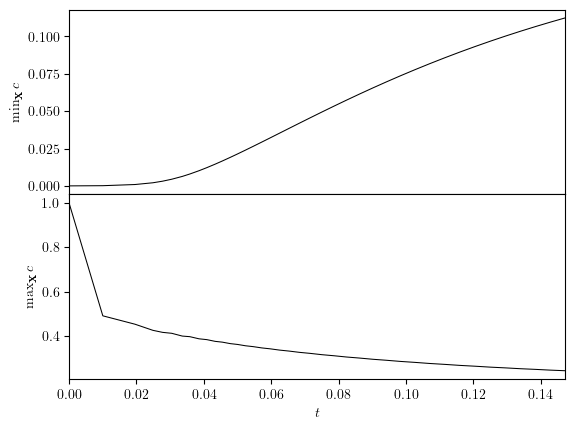

In [3]:
c_min = [minimum(i) for i in c.series]
c_max = [maximum(i) for i in c.series]

fig, ax = plot_stacked_lines(
    [(c.time_series, c_min), (c.time_series, c_max)],
    x_label='$t$',
    y_labels=['$\min_{\\textbf{x}}c$', '$\max_{\\textbf{x}}c$'],
)

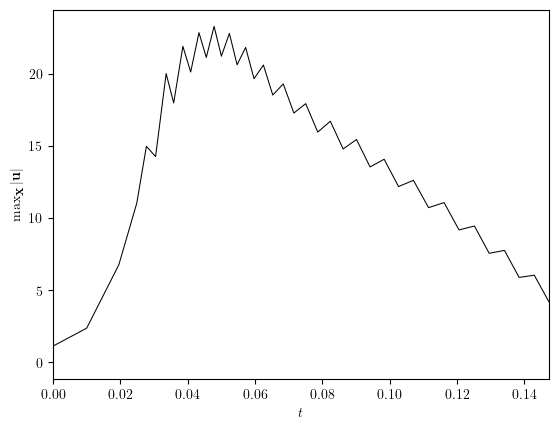

In [4]:
u_max = [maximum(i) for i in u.series]
fig, ax = plot_line((u.time_series, u_max), x_label='$t$', y_label='$\max_{\\textbf{x}}|\\textbf{u}|$')
# write(fig, f'A21_maragoni_convection_umax(t)', './figures', close=False, pickle=False)